In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('datas/housing.csv')

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Data Preparation

In [7]:
housing['mainroad'] = housing['mainroad'].map({'yes' : 1, 'no' : 0})
housing['guestroom'] = housing['guestroom'].map({'yes' : 1, 'no' : 0})
housing['basement'] = housing['basement'].map({'yes' : 1, 'no' : 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes' : 1, 'no' : 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes' : 1, 'no' : 0})
housing['prefarea'] = housing['prefarea'].map({'yes' : 1, 'no' : 0})

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
status = pd.get_dummies(housing['furnishingstatus'])

In [10]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [12]:
housing = pd.concat([housing, status], axis = 1)

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [14]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [15]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
housing['areaperbedrooms'] = housing['area']/housing['bedrooms']

In [17]:
housing['bbratio'] = housing['bedrooms']/housing['bathrooms']

In [18]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedrooms,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,1.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,4.0


In [19]:
# Recalling the Features

In [20]:
def normalize(x):
    return ( (x-np.min(x)) / (max(x) - min(x)))

housing = housing.apply(normalize)

In [21]:
# Splitting Data into Training and Testing Sets

In [22]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedrooms', 'bbratio'],
      dtype='object')

In [23]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areaperbedrooms', 'bbratio']]

y = housing[['price']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# Building Linear Model

In [26]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.10
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           4.71e-82
Time:                        11:45:33   Log-Likelihood:                 384.37
No. Observations:                 381   AIC:                            -736.7
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.038     

In [28]:
# Checking VIF

In [54]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_vars = input_data.drop([dependent_col], axis = 1)
    xvars_names = x_vars.columns
    for i in range(0, xvars_names.shape[0]):
        y=x_vars[xvars_names[i]]
        x=x_vars[xvars_names.drop(xvars_names[i])]
        req=sm.OLS(y, x).fit().rsquared
        vif=round(1/(1-req),2)
        vif_df.loc[i] = [xvars_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
    

In [55]:
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
1,bedrooms,103.15
14,bbratio,74.73
0,area,20.94
2,bathrooms,20.78
13,areaperbedrooms,18.72
4,mainroad,7.48
3,stories,2.83
11,semi-furnished,2.53
12,unfurnished,2.25
6,basement,2.05


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

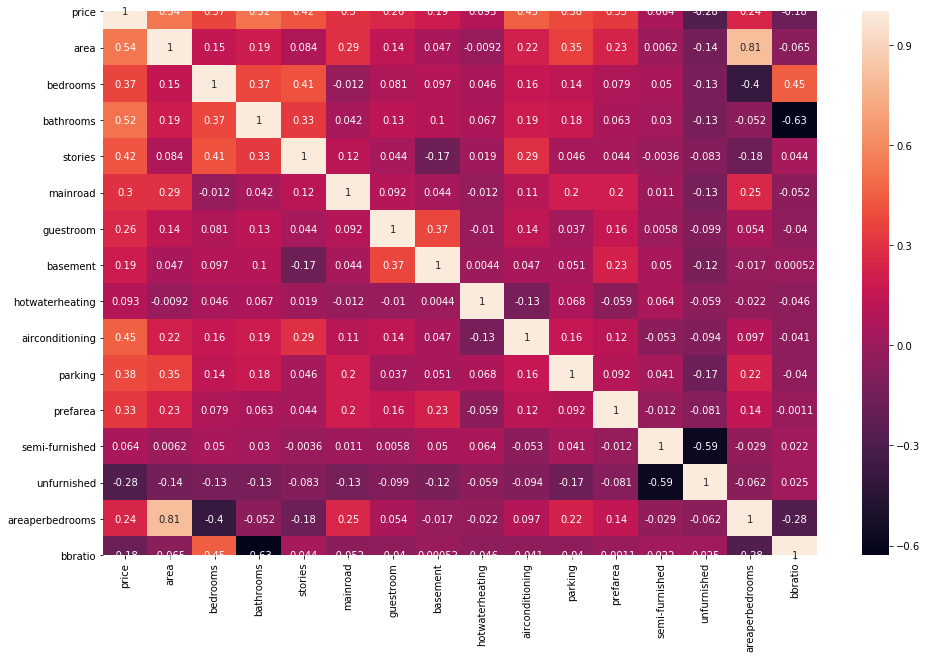

In [32]:
plt.figure(figsize=(16, 10))
sns.heatmap(housing.corr(), annot = True)

In [33]:
# Dropping the Variable and Updating the Model

In [82]:
X_train = X_train.drop('bbratio', 1)

KeyError: "['bbratio'] not found in axis"

In [38]:
lm_2 = sm.OLS(X_train, y_train).fit()

In [40]:
print(lm_2)

In [43]:
print(lm_2.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000021ED5D3B288>>


In [44]:
# Dropping the Variable and Updating the Model

In [56]:
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedrooms,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [59]:
lm_3 = sm.OLS(X_train, y_train).fit()

In [61]:
print(lm_3)

In [63]:
# Droping the Variable and Updating the Model

In [66]:
X_train = X_train.drop('areaperbedrooms', 1)

In [65]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedrooms,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.1
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.2
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.6


In [67]:
lm_4 = sm.OLS(X_train, y_train).fit()

In [71]:
print(lm_4)

In [73]:
vif_cal(input_data = housing.drop(['bedrooms', 'areaperbedrooms', 'bbratio'], axis = 1), dependent_col = "price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [74]:
vif_cal(input_data = housing.drop(['bedrooms', 'areaperbedrooms', 'bbratio', 'semi-furnished'], axis = 1), dependent_col = "price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [75]:
# Droping the Variable and Updating the Model

In [89]:
X_train = X_train.drop('basement', 1)

KeyError: "['basement'] not found in axis"

In [90]:
lm_6 = sm.OLS(X_train, y_train).fit()

In [92]:
print(lm_6)

In [93]:
vif_cal(input_data = housing.drop(['bedrooms', 'areaperbedrooms', 'bbratio', 'basement', 'semi-furnished'], axis = 1), dependent_col = "price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


In [94]:
# Making Predictions using Final Model

In [102]:
X_test_s6 = sm.add_constant(X_test)

In [103]:
X_test_s6 = X_test.drop(['bedrooms', 'areaperbedrooms', 'bbratio', 'basement', 'semi-furnished'], axis = 1)

In [104]:
y_pred_s6 = lm_6.predict(X_test_s6)

ValueError: shapes (164,10) and (1,13) not aligned: 10 (dim 1) != 1 (dim 0)

In [105]:
# Model Evaluation

NameError: name 'y_pred_s6' is not defined

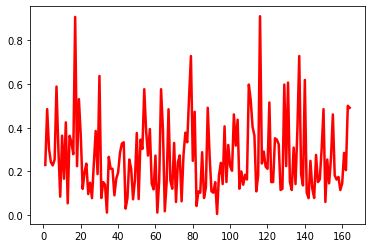

In [107]:
c = [i for i in range(1, 165, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred_s6, color = "blue", linewidth = 2.5, linestyle = "-")
plt.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Housing Price', fontsize = 16)

In [112]:
fig = plt.figure()
plt.scatter(y_test, y_pred_s6)
plt.suptitle('y_test vs y_pred_s6', fontsize = 20)
plt.xlabel("y_test", fontsize = 18)
plt.ylabel("y_pred_s6", fontsize = 16)

NameError: name 'y_pred_s6' is not defined

<Figure size 432x288 with 0 Axes>

In [113]:
fig = plt.figure()
c = [i for i in range(1, 165, 1)]
plt.plot(c, y_test - y_pred_s6, color = "blue", linewidth = 2.5, linestyle = "-")
plt.suptitle('Error_Terms', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('ytest-ypred',fontsize = 16)

NameError: name 'y_pred_s6' is not defined

<Figure size 432x288 with 0 Axes>